In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fblock

In [2]:
# Loading input file: CV and bias
data = np.loadtxt('cv-bias_test.dat')

In [3]:
# Check result of block transformation
print ("Possible number of block transformation:")
print ( len(fblock.blocker(data, multi=2)[1]) )

Possible number of block transformation:
2


In [4]:
# It may happen that the lenght of the dataset 
# do not have a sufficient number of divisors without a reminder.
# A solution for this will be implemented in the future.
# For now it's enough to remove few points at the bottom (of each replica)
data1 = data[:int(len(data)/2)]
data2 = data[int(len(data)-len(data)/2):]
data = (np.concatenate((data1[:int(len(data1)-1)],data2[:int(len(data1)-1)])))

In [5]:
print ("Possible number of block transformation:")
print ( len(fblock.blocker(data)[1]) )

Possible number of block transformation:
71


In [6]:
# Now we can proceed to reblock the dataset.
# The fblocking function will calculate 
# the mean error of the average histogram bins for each block size.
stat = fblock.fblocking(cv=data[...,1], bias=data[...,2], temp=323, multi=2)

<ErrorbarContainer object of 3 artists>

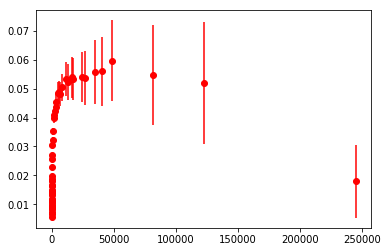

In [7]:
plt.errorbar(stat[...,0],stat[...,1],stat[...,2], fmt='ro')

In [10]:
def optimal_block(ndata, stat):
    err_first = stat[0,1]
    opt = None
    
    for (block_size, err, err_err) in reversed(stat):
        B3 =  block_size**3
        if B3 > 2*ndata*(err/err_first)**4 :
            opt = (block_size, err)
            
    if (opt[0] > (ndata/50)):
        print( "You may not be converging. Sample more." )
    
    return opt

In [11]:
# Attempt prediction of the fixed point
bs, err = optimal_block(len(data),stat)

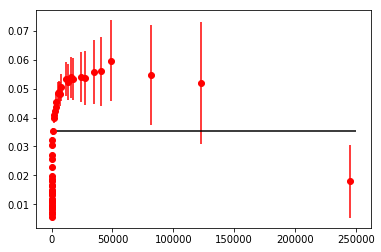

In [12]:
plt.errorbar(stat[...,0],stat[...,1],stat[...,2], fmt='ro')
plt.hlines(err,0,250000)

# TODOs:
## Optimize prediction of the fixed point (include error bars?)
## Introduce functions to calculate hist/fes with errors given a block size